In [1]:
import sklearn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, precision_recall_fscore_support
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt  
import seaborn as sns

In [2]:
df = pd.read_csv("online_shoppers_intention.csv")
preprocessed_df = pd.read_csv("preprocessedData.csv")

In [3]:
categorical_features = ['OperatingSystems_1', 'OperatingSystems_2', 'OperatingSystems_3', 'OperatingSystems_4', 'OperatingSystems_5', 'OperatingSystems_6', 'OperatingSystems_7', 'OperatingSystems_8', 'Browser_1', 'Browser_2', 'Browser_3', 'Browser_4', 'Browser_5', 'Browser_6', 'Browser_7', 'Browser_8', 'Browser_9', 'Browser_10', 'Browser_11', 'Browser_12', 'Browser_13', 'Region_1', 'Region_2', 'Region_3', 'Region_4', 'Region_5', 'Region_6', 'Region_7', 'Region_8', 'Region_9', 'TrafficType_1', 'TrafficType_2', 'TrafficType_3', 'TrafficType_4', 'TrafficType_5', 'TrafficType_6', 'TrafficType_7', 'TrafficType_8', 'TrafficType_9', 'TrafficType_10', 'TrafficType_11', 'TrafficType_12', 'TrafficType_13', 'TrafficType_14', 'TrafficType_15', 'TrafficType_16', 'TrafficType_17', 'TrafficType_18', 'TrafficType_19', 'TrafficType_20', 'VisitorType_New_Visitor', 'VisitorType_Other', 'VisitorType_Returning_Visitor', 'Weekend_False', 'Weekend_True', 'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep']
target = "Revenue"

preprocessed_df[categorical_features] = preprocessed_df[categorical_features].astype('category') 
preprocessed_df[target] = preprocessed_df[target].astype('category') 

In [4]:
preprocessed_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 77 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Unnamed: 0                     12330 non-null  int64   
 1   Administrative                 12330 non-null  float64 
 2   Administrative_Duration        12330 non-null  float64 
 3   Informational                  12330 non-null  float64 
 4   Informational_Duration         12330 non-null  float64 
 5   ProductRelated                 12330 non-null  float64 
 6   ProductRelated_Duration        12330 non-null  float64 
 7   BounceRates                    12330 non-null  float64 
 8   ExitRates                      12330 non-null  float64 
 9   PageValues                     12330 non-null  float64 
 10  SpecialDay                     12330 non-null  float64 
 11  Revenue                        12330 non-null  category
 12  OperatingSystems_1             1

In [5]:
# Split dataframe into x and y

X = preprocessed_df.drop(columns=["Revenue"])
y = preprocessed_df["Revenue"].values

In [6]:
# Split dataframe into train and test data
# Note: Stratify preserves the propotion of Revenue of T/F in the testing and training sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

# KNN Classifier

In [7]:
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3)

# Fit the classifier to the data
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [8]:
# Show first 100 model predictions on the test data
y_preds_knn = knn.predict(X_test)
knn.predict(X_test)[0:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [9]:
# Accuracy on the test data
knn.score(X_test, y_test)

0.8175182481751825

###  Confusion Matrix

In [10]:
conf_mat = confusion_matrix(y_test, y_preds_knn)
print(conf_mat)

[[2976  151]
 [ 524   48]]


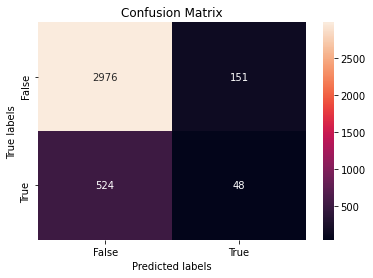

In [11]:
ax = plt.subplot()
sns.heatmap(conf_mat, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['False', 'True']); ax.yaxis.set_ticklabels(['False', 'True']);

### F1-Score 

In [12]:
print('Overall F1-Score                                    : %.6f'%f1_score(y_test, y_preds_knn))
print('\nClassification Report                       : ')
print(classification_report(y_test, y_preds_knn))

Overall F1-Score                                    : 0.124514

Classification Report                       : 
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      3127
           1       0.24      0.08      0.12       572

    accuracy                           0.82      3699
   macro avg       0.55      0.52      0.51      3699
weighted avg       0.76      0.82      0.78      3699



# SVM Classifier

In [13]:
# Create SVM classifier
svclassifier = SVC(kernel='linear', probability=True)

# Fit the classifier to the data
svclassifier.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

In [14]:
# Show first 100 model predictions on the test data
y_preds_svm = svclassifier.predict(X_test)
svclassifier.predict(X_test)[0:100]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [15]:
# Accuracy on the test data
svclassifier.score(X_test, y_test)

0.8778048121113815

### Confusion Matrix

In [16]:
conf_mat = confusion_matrix(y_test, y_preds_knn)
print(conf_mat)

[[2976  151]
 [ 524   48]]


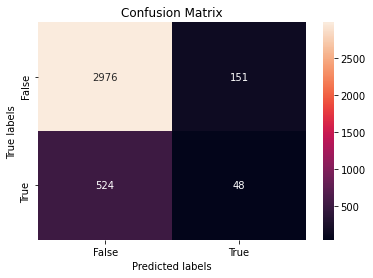

In [17]:
ax = plt.subplot()
sns.heatmap(conf_mat, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['False', 'True']); ax.yaxis.set_ticklabels(['False', 'True']);

### F1-Score

In [18]:
print('Overall F1-Score                                    : %.6f'%f1_score(y_test, y_preds_svm))
print('\nClassification Report                       : ')
print(classification_report(y_test, y_preds_svm))

Overall F1-Score                                    : 0.488688

Classification Report                       : 
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      3127
           1       0.69      0.38      0.49       572

    accuracy                           0.88      3699
   macro avg       0.79      0.67      0.71      3699
weighted avg       0.86      0.88      0.86      3699



# Single Decision Tree Classifier

In [19]:
decisionTree = DecisionTreeClassifier()
decisionTree.fit(X_train, y_train)

DecisionTreeClassifier()

In [20]:
y_preds_dt = decisionTree.predict(X_test)
decisionTree.predict(X_test)[0:100]

array([0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [21]:
# Accuracy on the test data
decisionTree.score(X_test, y_test)

0.8626655852933225

### Confusion Matrix

In [22]:
conf_mat = confusion_matrix(y_test, y_preds_dt)
print(conf_mat)

[[2850  277]
 [ 231  341]]


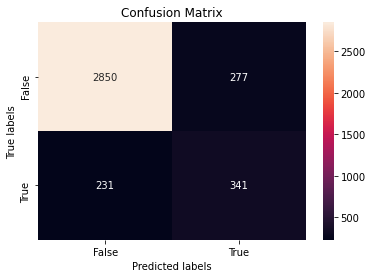

In [23]:
ax = plt.subplot()
sns.heatmap(conf_mat, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['False', 'True']); ax.yaxis.set_ticklabels(['False', 'True']);

### F1-Score

In [24]:
print('Overall F1-Score                                    : %.6f'%f1_score(y_test, y_preds_dt))
print('\nClassification Report                       : ')
print(classification_report(y_test, y_preds_dt))

Overall F1-Score                                    : 0.573109

Classification Report                       : 
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      3127
           1       0.55      0.60      0.57       572

    accuracy                           0.86      3699
   macro avg       0.74      0.75      0.75      3699
weighted avg       0.87      0.86      0.86      3699



# Random Forest

In [25]:
randomForest = RandomForestClassifier(n_estimators=100, random_state=0)
randomForest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [26]:
y_preds_rf = randomForest.predict(X_test)
randomForest.predict(X_test)[0:100]

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [27]:
# Accuracy on the test data
randomForest.score(X_test, y_test)

0.9005136523384698

### Confusion Matrix

In [28]:
cont_mat = confusion_matrix(y_test, y_preds_rf)
print(conf_mat)

[[2850  277]
 [ 231  341]]


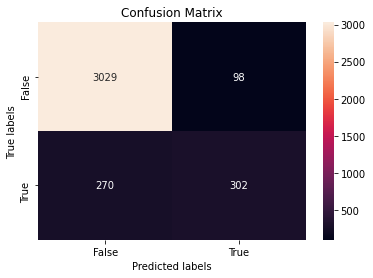

In [29]:
ax = plt.subplot()
sns.heatmap(cont_mat, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['False', 'True']); ax.yaxis.set_ticklabels(['False', 'True']);

### F1-Score

In [30]:
print('Overall F1-Score                                    : %.6f'%f1_score(y_test, y_preds_rf))
print('\nClassification Report                       : ')
print(classification_report(y_test, y_preds_rf))

Overall F1-Score                                    : 0.621399

Classification Report                       : 
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      3127
           1       0.76      0.53      0.62       572

    accuracy                           0.90      3699
   macro avg       0.84      0.75      0.78      3699
weighted avg       0.89      0.90      0.89      3699



# ROC Curve 

In [37]:
# ROC area for each class

auc_knn = roc_auc_score(y_test, y_preds_knn)
print('AUC KNN: %.6f' % auc_knn)

auc_svm = roc_auc_score(y_test, y_preds_svm)
print('AUC SVM: %.6f' % auc_svm)

auc_dt = roc_auc_score(y_test, y_preds_dt)
print('AUC Decision Tree: %.6f' % auc_dt)

auc_rf = roc_auc_score(y_test, y_preds_rf)
print('AUC Random Forest: %.6f' % auc_rf)

AUC KNN: 0.517813
AUC SVM: 0.673461
AUC Decision Tree: 0.753785
AUC Random Forest: 0.748316


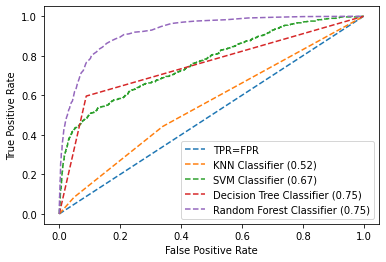

In [40]:
# Generating ROC Curve Plot

y_pred_roc_knn = knn.predict_proba(X_test)[:,1] 
y_pred_roc_svm = svclassifier.predict_proba(X_test)[:,1] 
y_pred_roc_dt = decisionTree.predict_proba(X_test)[:,1] 
y_pred_roc_rf = randomForest.predict_proba(X_test)[:,1] 


# For the straight line
straight_probs = [0 for _ in range(len(y_test))]
straight_fpr, straight_tpr, _ = roc_curve(y_test, straight_probs)
pyplot.plot(straight_fpr, straight_tpr, linestyle='--', label="TPR=FPR")

# For KNN Classifier
knn_fpr, knn_tpr, _ = roc_curve(y_test, y_pred_roc_knn)
pyplot.plot(knn_fpr, knn_tpr, linestyle='--', label='KNN Classifier ({:.2f})'.format(auc_knn))

# For SVM Classifier
svm_fpr, svm_tpr, _ = roc_curve(y_test, y_pred_roc_svm)
pyplot.plot(svm_fpr, svm_tpr, linestyle='--', label='SVM Classifier ({:.2f})'.format(auc_svm))

# For Decition Tree Classifier
dt_fpr, dt_tpr, _ = roc_curve(y_test, y_pred_roc_dt)
pyplot.plot(dt_fpr, dt_tpr, linestyle='--', label='Decision Tree Classifier ({:.2f})'.format(auc_dt))

# For Random Forest Classifier
rf_fpr, rf_tpr, _ = roc_curve(y_test, y_pred_roc_rf)
pyplot.plot(rf_fpr, rf_tpr, linestyle='--', label='Random Forest Classifier ({:.2f})'.format(auc_rf))

# To Plot
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.savefig("ROCCurve.png")
pyplot.show()